In [1]:
import pandas as pd
import scipy.stats as st
import statsmodels as s
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
warnings.formatwarning = False

In [2]:
import seaborn as sns

eda  lets discover the 

In [3]:
data = pd.read_csv("Superstore Dataset.csv")

In [4]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [5]:
data.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
data.drop_duplicates(inplace=True)

In [7]:
#find the summary for the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9993.0,55191.576403,32065.074478,1040.000,23223.000,56560.000,90008.000,99301.000
Sales,9993.0,229.852846,623.276074,0.444,17.280,54.480,209.940,22638.480
Quantity,9993.0,3.789753,2.225149,1.000,2.000,3.000,5.000,14.000
Discount,9993.0,0.156188,0.206457,0.000,0.000,0.200,0.200,0.800
Profit,9993.0,28.660971,234.271476,-6599.978,1.731,8.671,29.364,8399.976


In [6]:
df = data.copy(deep=True)

In [7]:
df.sort_values(by='Order Date',inplace= True)

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['month'] = df['Order Date'].dt.month

In [11]:
# sales data
s =df[["Sales","month"]]

In [12]:
s.set_index(df['Order Date'],inplace=True)

In [13]:
s.head()

,Sales,month
Order Date,,
2019-01-03,16.448,1
2019-01-04,11.784,1
2019-01-04,272.736,1
2019-01-04,3.540,1
2019-01-05,19.536,1


which month is salses the most

<AxesSubplot:xlabel='month'>

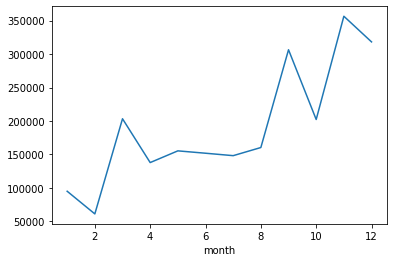

In [14]:
df.groupby(['month'])['Sales'].sum().plot()

In [15]:
s.index

DatetimeIndex(['2019-01-03', '2019-01-04', '2019-01-04', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-06', '2019-01-06',
               '2019-01-06', '2019-01-06',
               ...
               '2022-12-29', '2022-12-29', '2022-12-29', '2022-12-30',
               '2022-12-30', '2022-12-30', '2022-12-30', '2022-12-30',
               '2022-12-30', '2022-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9993, freq=None)

In [16]:
df.month

0        1
1        1
2        1
3        1
4        1
        ..
9988    12
9989    12
9990    12
9991    12
9993    12
Name: month, Length: 9993, dtype: int64

<AxesSubplot:>

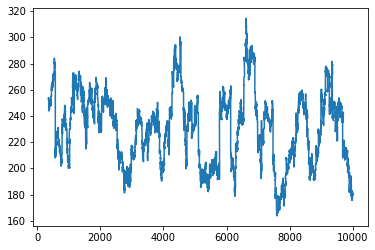

In [17]:
df.Sales.rolling(360).mean().plot()

In [18]:
#time series analysis
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
s.head()

,Sales,month
Order Date,,
2019-01-03,16.448,1
2019-01-04,11.784,1
2019-01-04,272.736,1
2019-01-04,3.540,1
2019-01-05,19.536,1


In [20]:
s = pd.DataFrame(s.groupby(s.index).sum())

In [21]:
s.index = pd.to_datetime(s.index)

In [22]:
s.sort_index(inplace=True)

In [23]:
s.head()

,Sales,month
Order Date,,
2019-01-03,16.448,1
2019-01-04,288.060,3
2019-01-05,19.536,1
2019-01-06,4407.100,9
2019-01-07,87.158,2


In [24]:
sales = df.groupby(['Order Date'])['Sales'].sum()

In [25]:
sales =  pd.DataFrame(sales)

In [26]:
sales.head()

,Sales
Order Date,
2019-01-03,16.448
2019-01-04,288.060
2019-01-05,19.536
2019-01-06,4407.100
2019-01-07,87.158


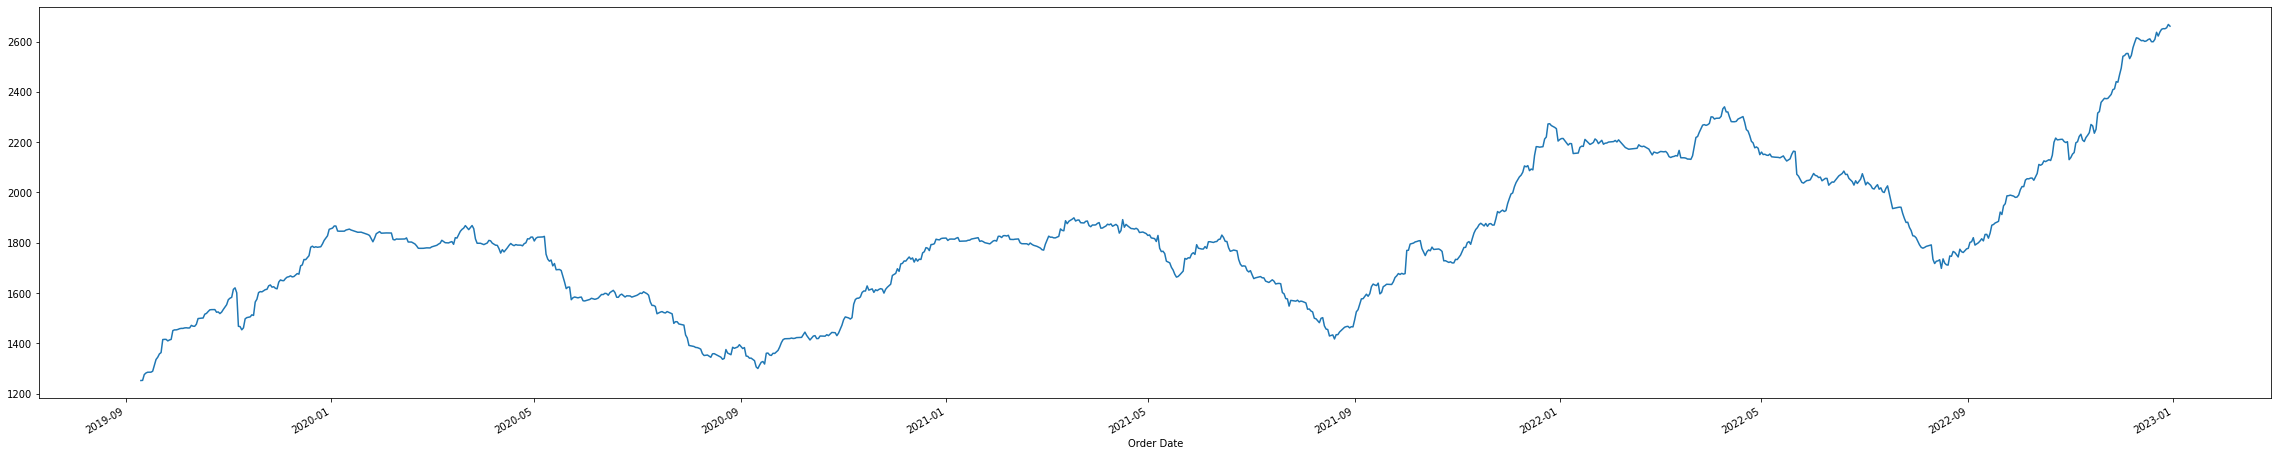

In [27]:
plt.figure(figsize=(40,8))
s.Sales.rolling(200).mean().plot(figsize=(40,8))
plt.show()

In [28]:
s.head()

,Sales,month
Order Date,,
2019-01-03,16.448,1
2019-01-04,288.060,3
2019-01-05,19.536,1
2019-01-06,4407.100,9
2019-01-07,87.158,2


In [29]:
s.reset_index()

,Order Date,Sales,month
0,2019-01-03,16.4480,1
1,2019-01-04,288.0600,3
2,2019-01-05,19.5360,1
3,2019-01-06,4407.1000,9
4,2019-01-07,87.1580,2
...,...,...,...
1232,2022-12-26,814.5940,48
1233,2022-12-27,177.6360,24
1234,2022-12-28,1657.3508,228
1235,2022-12-29,2915.5340,144


In [30]:
f = seasonal_decompose(sales,period=40 )

<Figure size 2880x576 with 0 Axes>

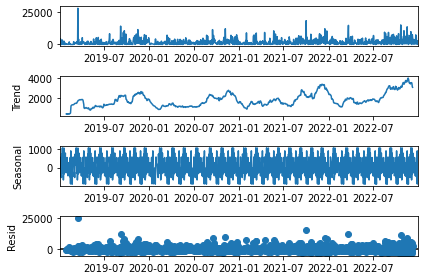

In [31]:
plt.figure(figsize=(40,8))
f.plot()
plt.show()

In [32]:
sales['trend'] = f.trend
sales['sesonal'] = f.seasonal


<AxesSubplot:xlabel='Order Date'>

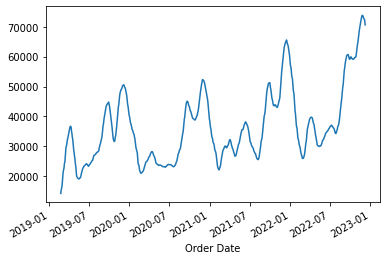

In [33]:
sales['trend'].rolling(20).sum().plot()

In [34]:
px.line(sales['trend'].rolling(10).sum())

In [35]:
px.line(sales['sesonal'].rolling(30).sum())

when the sesonality is repeted jan , march,april,jun,aug, sep,novamberm,dec,feb,apr,may,jul,aug,seb,novamber,dec
that mean the start of year sesonal in 2 month until aug it will be every month which is mean sales get increas in the last quarter 

<AxesSubplot:xlabel='Order Date'>

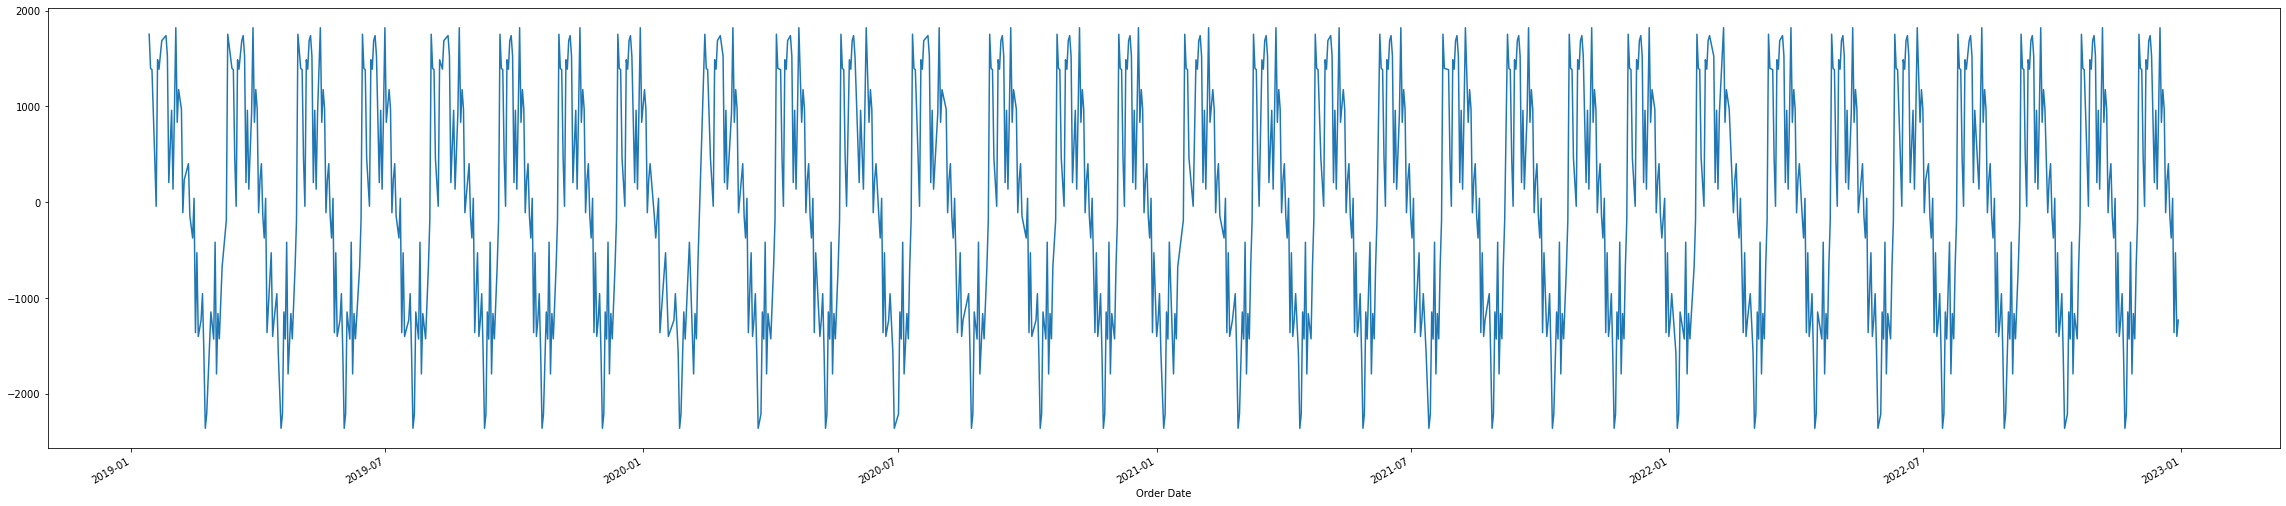

In [36]:
sales['sesonal'].rolling(10).sum().plot(figsize = (40,9))

In [37]:
sales.head()

,Sales,trend,sesonal
Order Date,,,
2019-01-03,16.448,NaN,59.930299
2019-01-04,288.060,NaN,572.881384
2019-01-05,19.536,NaN,267.717474
2019-01-06,4407.100,NaN,152.988060
2019-01-07,87.158,NaN,-474.231553


<AxesSubplot:xlabel='Order Date'>

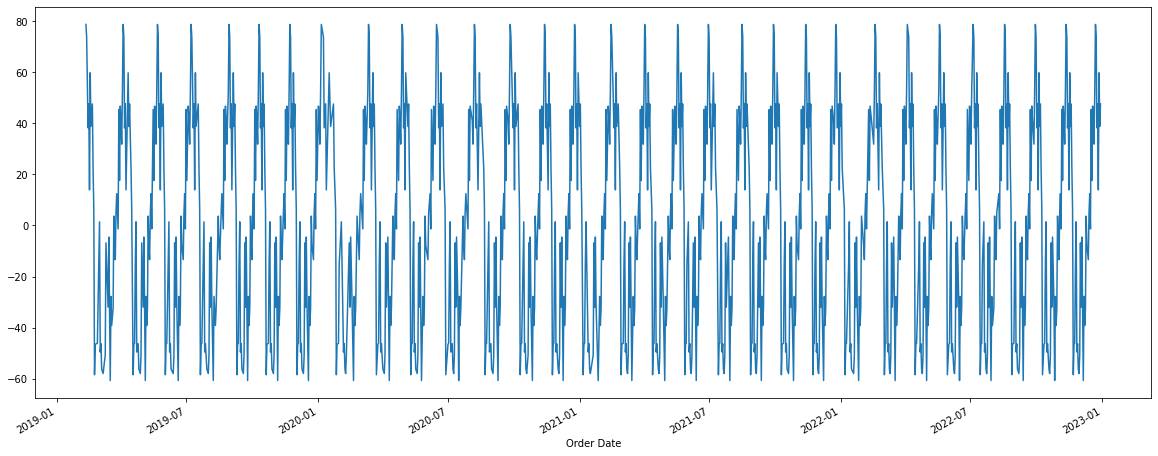

In [38]:
plt.figure(figsize=(20,8))
sales['sesonal'].rolling(30).mean().plot()

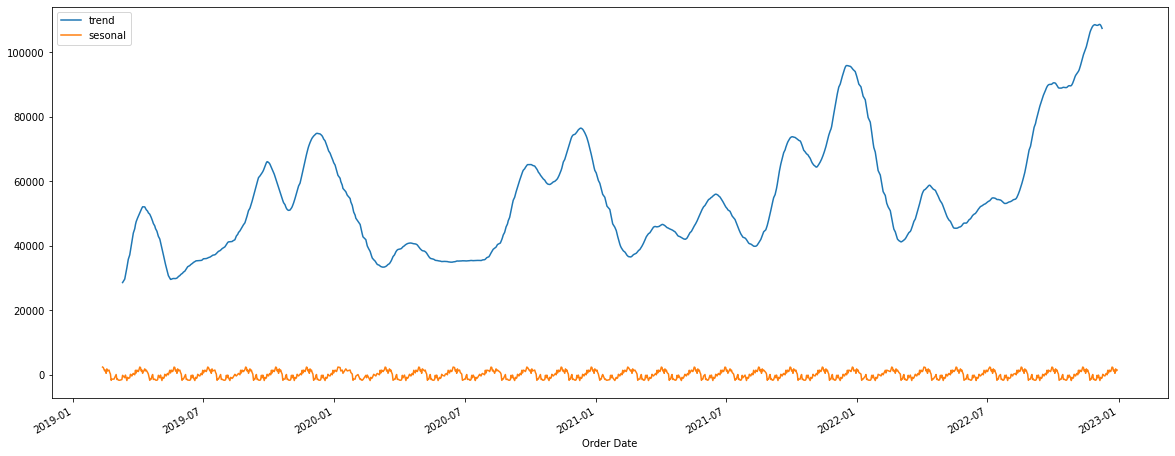

In [39]:
plt.figure(figsize=(20,8))
sales['trend'].rolling(30).sum().plot()
sales['sesonal'].rolling(30).sum().plot()
plt.legend()
plt.show()


the data non stationary an have increase by year trend also the data has seasonality the sales spill in the start year and get  gross increase become in ogust month till the 8 month end of year summer and attum 

In [40]:

px.line(df[['Sales','Profit']])



In [41]:
# want to cheak which qaurter is made the most sales

In [42]:
df.groupby(df['Order Date'].dt.quarter)['Sales'].sum()

Order Date
1    359681.5758
2    445228.2476
3    615090.5197
4    876919.1452
Name: Sales, dtype: float64

In [43]:
df.rename(columns={"Order Date":"Order_Date"} , inplace=True)

In [44]:
y_2019 = df.query('Order_Date.dt.year == 2019')
y_2020 = df.query('Order_Date.dt.year == 2020')
y_2021 = df.query('Order_Date.dt.year == 2021')
y_2022= df.query('Order_Date.dt.year == 2022')
y_2023 = df.query('Order_Date.dt.year == 2023')

In [45]:
l = [y_2019, y_2020, y_2021,y_2022 ,y_2023 ]

In [46]:
for i in l:
    print(f"{i.groupby(df['Order_Date'].dt.quarter)['Sales'].sum()}")

Order_Date
1     74447.7960
2     86257.3876
3    143633.2123
4    179627.7302
Name: Sales, dtype: float64
Order_Date
1     68851.7386
2     89124.1870
3    131417.9892
4    181138.5942
Name: Sales, dtype: float64
Order_Date
1     93237.1810
2    136082.3010
3    143787.3622
4    236098.7538
Name: Sales, dtype: float64
Order_Date
1    123144.8602
2    133764.3720
3    196251.9560
4    280054.0670
Name: Sales, dtype: float64
Series([], Name: Sales, dtype: float64)


<AxesSubplot:xlabel='Order_Date', ylabel='Sales'>

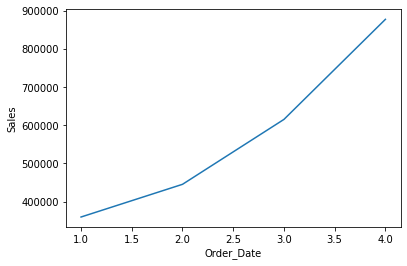

In [47]:

sns.lineplot(data = df.groupby(df['Order_Date'].dt.quarter)['Sales'].sum(),markers="o")
   


from the previous we can say that first quarter is the worst 3 month in the year for sale we can say winter is the worst seson for sell the sales get better in spring and summer and peak in attum with the holiday season 


## see if theres signeficnt different  
between the ship mode or not and cheak also the distribution 
first of all cheak normality and homoganity 

# shipmode 

In [48]:
## cheak normality 

In [49]:
df['Ship Mode'].value_counts()

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [50]:
df.groupby(['Ship Mode'])['Sales'].mean()

Ship Mode
First Class       228.497024
Same Day          236.396179
Second Class      236.089239
Standard Class    227.574052
Name: Sales, dtype: float64

In [51]:
df.groupby(['Ship Mode'])['Sales'].median()

Ship Mode
First Class       54.940
Same Day          55.176
Second Class      57.900
Standard Class    52.760
Name: Sales, dtype: float64

In [52]:
df['Ship Mode'].value_counts()

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [53]:
df = data.copy()

In [54]:
df[df['Ship Mode'] == "First Class"]['Sales']
df[df['Ship Mode'] == "Standard Class"]['Sales']
df[df['Ship Mode'] == "Second Class"]['Sales']
df[df['Ship Mode'] == "Same Day"]['Sales']

114      25.160
149     354.900
201       4.448
203      15.552
208       5.184
         ...   
9868     15.920
9898     13.480
9952    750.680
9954     13.248
9955    164.388
Name: Sales, Length: 543, dtype: float64

In [55]:
from scipy.stats import f_oneway

In [56]:
f_oneway(df[df['Ship Mode'] == "First Class"]['Sales'],
df[df['Ship Mode'] == "Standard Class"]['Sales'],
df[df['Ship Mode'] == "Second Class"]['Sales'],
df[df['Ship Mode'] == "Same Day"]['Sales'])

F_onewayResult(statistic=0.11384119287572843, pvalue=0.9520366342030471)

there no diffrent in the group mean 
lets chrak the distripution

In [57]:
h = [df[df['Ship Mode'] == "First Class"]['Sales'],
df[df['Ship Mode'] == "Standard Class"]['Sales'],
df[df['Ship Mode'] == "Second Class"]['Sales'],
df[df['Ship Mode'] == "Same Day"]['Sales']]

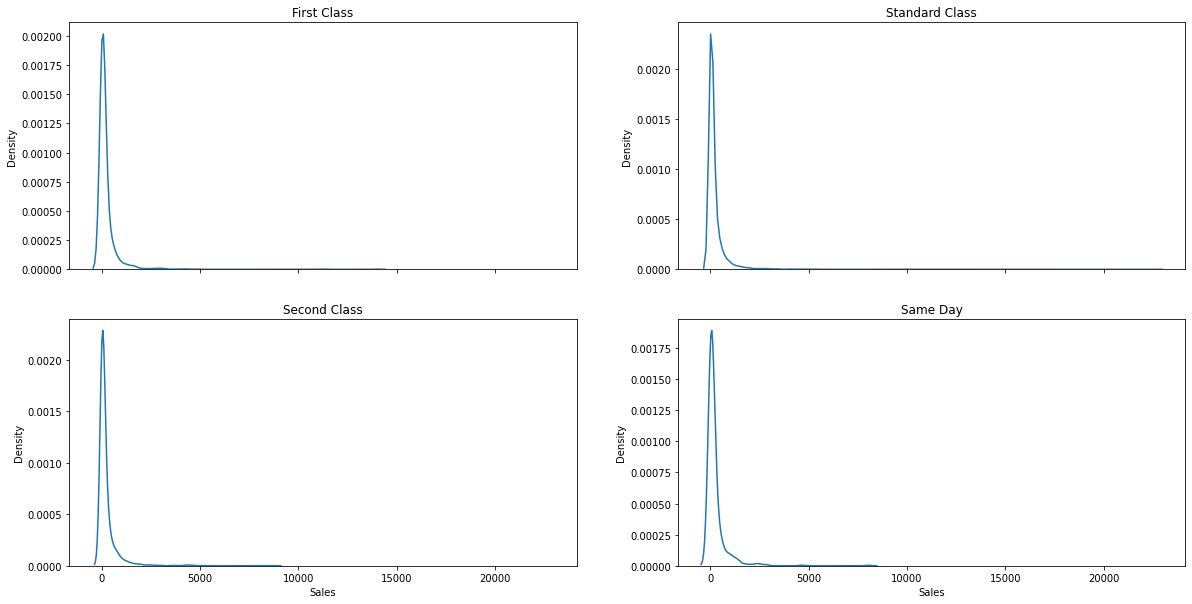

In [58]:

fig , ax = plt.subplots(2,2,sharex=True,figsize = (20,10))
sns.kdeplot(ax =ax[0,0] ,data =h[0])
ax[0,0].set_title("First Class")
sns.kdeplot(ax = ax[0,1] ,data = h[1])
ax[0,1].set_title("Standard Class")
sns.kdeplot(ax = ax[1,0],data=h[2])
ax[1,0].set_title("Second Class")
sns.kdeplot(ax = ax[1,1],data = h[3])
ax[1,1].set_title( "Same Day")
plt.show()

no diff i distripution also

In [59]:
import statsmodels.formula.api as sm
from statsmodels.stats import anova

In [60]:
df.rename(columns={"Ship Mode":"Ship_Mode"} , inplace=True)

In [61]:
shipmode_sales = sm.ols('Sales ~ Ship_Mode',data=df).fit()

In [62]:
anova.anova_lm(shipmode_sales)

,df,sum_sq,mean_sq,F,PR(>F)
Ship_Mode,3.0,1.327080e+05,44236.006487,0.113841,0.952037
Residual,9989.0,3.881490e+09,388576.449086,NaN,NaN


In [63]:
df.Ship_Mode.value_counts()

Standard Class    5967
Second Class      1945
First Class       1538
Same Day           543
Name: Ship_Mode, dtype: int64

the amount of sales get by which ship mode

In [64]:

df.groupby("Ship_Mode")['Sales'].sum()

Ship_Mode
First Class       3.514284e+05
Same Day          1.283631e+05
Second Class      4.591936e+05
Standard Class    1.357934e+06
Name: Sales, dtype: float64

see wich **ship mode** is the most sales shipped by and the follow plot id for the count of sales

In [65]:

px.bar(df.groupby("Ship_Mode")['Sales'].sum().sort_values())

In [66]:
px.bar(df.Ship_Mode.value_counts())

**profit column**

In [67]:
df["Profit"]

0        5.5512
1        4.2717
2      -64.7748
3       -5.4870
4        4.8840
         ...   
9989    -0.6048
9990    19.7910
9991     2.7279
9992     4.5188
9993    12.1176
Name: Profit, Length: 9993, dtype: float64

In [68]:
px.bar(df.groupby(['Ship_Mode'])["Profit"].sum())

In [69]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship_Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [70]:
px.scatter(df.groupby(['Product ID'])["Profit"].sum())

from previous graph we note that some of product made loss for us and we have to see why and we can see **TEC-CO-10004722** IS THE MOST product make profit 

In [71]:
# lets cheak the count of product that made loss in the profit and with is made 0 profit 
df.groupby(df['Product ID'])['Profit'].sum().sort_values()
    

Product ID
TEC-MA-10000418    -8879.9704
TEC-MA-10000822    -4589.9730
TEC-MA-10004125    -3839.9904
FUR-TA-10000198    -2876.1156
FUR-TA-10001889    -1934.3976
                      ...    
TEC-AC-10002049     4425.3432
TEC-CO-10003763     4570.9347
TEC-CO-10001449     6983.8836
OFF-BI-10003527     7753.0390
TEC-CO-10004722    25199.9280
Name: Profit, Length: 1862, dtype: float64

In [72]:
profit_product = pd.DataFrame(df.groupby(df['Product ID'])['Profit'].sum().sort_values())

In [73]:
profit_product.reset_index(inplace=True)

In [74]:
profit_product

,Product ID,Profit
0,TEC-MA-10000418,-8879.9704
1,TEC-MA-10000822,-4589.9730
2,TEC-MA-10004125,-3839.9904
3,FUR-TA-10000198,-2876.1156
4,FUR-TA-10001889,-1934.3976
...,...,...
1857,TEC-AC-10002049,4425.3432
1858,TEC-CO-10003763,4570.9347
1859,TEC-CO-10001449,6983.8836
1860,OFF-BI-10003527,7753.0390


In [75]:
loss = profit_product[profit_product['Profit'] <= 0 ]

In [76]:
loss.columns

Index(['Product ID', 'Profit'], dtype='object')

In [77]:
loss.shape

(303, 2)

In [78]:
profit_product.columns

Index(['Product ID', 'Profit'], dtype='object')

In [79]:
## want to graph the loss profit  and the profit product
px.scatter(data_frame = profit_product ,x='Product ID',  y ='Profit' ,title = "the loss profit  and the profit product")

# conclosion#
we have to make some more analysis with pricing strategety or there compition or wrong in calculate the cost expenses

In [80]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

*sales by day and month* 

In [81]:
df['Day'] =df['Order Date'].dt.day_name()

In [82]:
df['Day'].sort_values()

9993       Friday
3498       Friday
3499       Friday
2381       Friday
2382       Friday
          ...    
8944    Wednesday
8943    Wednesday
8942    Wednesday
5528    Wednesday
8739    Wednesday
Name: Day, Length: 9993, dtype: object

**which day we get the most profit**

In [83]:
px.bar(df.groupby(['Day'])['Profit'].sum().sort_index(),title="the  profit per day")

which month we make the most money

In [84]:
px.bar(df.groupby(df['Order Date'].dt.month)['Profit'].sum(), title="the profit by month")

In [85]:
df[df['Profit'] <= 0]

,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Day
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.7360,3,0.20,-64.7748,Friday
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.5400,2,0.80,-5.4870,Friday
14,CA-2019-105417,2019-01-07,2019-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,...,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.7280,3,0.60,-53.7096,Monday
15,CA-2019-105417,2019-01-07,2019-01-12,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,...,Central,OFF-BI-10003708,Office Supplies,Binders,Acco Four Pocket Poly Ring Binder with Label H...,10.4300,7,0.80,-18.2525,Monday
24,CA-2019-118192,2019-01-13,2019-01-18,Standard Class,MM-17920,Michael Moore,Consumer,United States,Newark,Ohio,...,East,OFF-BI-10003476,Office Supplies,Binders,Avery Metallic Poly Binders,3.4380,2,0.70,-2.5212,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9970,CA-2022-163860,2022-12-28,2023-01-01,Standard Class,LO-17170,Lori Olson,Corporate,United States,Peoria,Illinois,...,Central,FUR-FU-10001935,Furniture,Furnishings,3M Hangers With Command Adhesive,2.9600,2,0.60,-1.4060,Wednesday
9971,CA-2022-136539,2022-12-28,2023-01-01,Standard Class,GH-14665,Greg Hansen,Consumer,United States,Round Rock,Texas,...,Central,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",78.8528,2,0.32,-11.5960,Wednesday
9974,US-2022-162068,2022-12-28,2022-12-31,Second Class,PC-18745,Pamela Coakley,Corporate,United States,Loveland,Colorado,...,West,OFF-BI-10002813,Office Supplies,Binders,Avery Reinforcements for Hole-Punch Pages,1.1880,2,0.70,-0.9900,Wednesday
9981,CA-2022-118885,2022-12-29,2023-01-02,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,California,...,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.5680,4,0.20,-44.2764,Thursday


In [86]:
df['Order Date'] =pd.to_datetime(df['Order Date']) 

In [87]:
pro_ye = df.groupby(df['Order Date'].dt.year )['Profit'].sum()

*the growth rate for product*

In [88]:
growth = pd.Series(pro_ye).pct_change()*100

In [89]:
pro_ye.values

array([49556.0329, 61618.6037, 81795.1743, 93439.2696])

In [90]:
#the growth rate by year
growth

Order Date
2019          NaN
2020    24.341276
2021    32.744284
2022    14.235675
Name: Profit, dtype: float64

No handles with labels found to put in legend.


<Figure size 1440x2160 with 0 Axes>

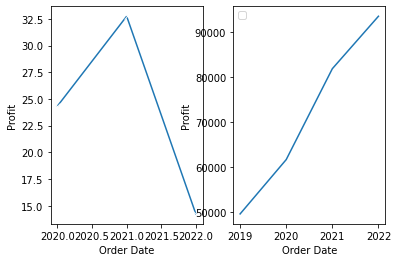

In [91]:
plt.figure(figsize=(20,30))
f,axes = plt.subplots(1,2)
sns.lineplot(ax =axes[0], data = growth,marker = "x")
sns.lineplot(ax =axes[1],data= pro_ye)
plt.legend()
plt.show()

# find the reason for why data growth grt down 

In [92]:
df['year'] = df['Order Date'].dt.year

In [93]:
year = df['Order Date'].dt.year.unique()

In [94]:
# funvtion to get the number of transaction per year to see why this slip happen in data
for y in year:
    print(f"the transction in year {y} : is {len(df[df['year'] == y])}")

the transction in year 2019 : is 1992
the transction in year 2020 : is 2102
the transction in year 2021 : is 2587
the transction in year 2022 : is 3312


In [95]:
#find the value for transaction
for y in year:
    print(f" {df[df['year'] == y].groupby(['year'])['Sales'].sum()}")

 year
2019    483966.1261
Name: Sales, dtype: float64
 year
2020    470532.509
Name: Sales, dtype: float64
 year
2021    609205.598
Name: Sales, dtype: float64
 year
2022    733215.2552
Name: Sales, dtype: float64


In [96]:
for y in year:
    print(f" {df[df['year'] == y].groupby(['year'])['Profit'].sum()}")

 year
2019    49556.0329
Name: Profit, dtype: float64
 year
2020    61618.6037
Name: Profit, dtype: float64
 year
2021    81795.1743
Name: Profit, dtype: float64
 year
2022    93439.2696
Name: Profit, dtype: float64


In [97]:
for y in year:
    print(f" {df[df['year'] == y].groupby(['year'])['Discount'].sum()}")

 year
2019    315.16
Name: Discount, dtype: float64
 year
2020    327.09
Name: Discount, dtype: float64
 year
2021    400.32
Name: Discount, dtype: float64
 year
2022    518.22
Name: Discount, dtype: float64


In [130]:
vizz = df.groupby(['Order Date']).agg({"Customer ID":"nunique",'Sales':'mean'})

In [131]:
px.line(vizz)

# cltv 

### the steps to calculate the **cltv** is ** 
1) first we getnthe recency the fist data customer order to las date he is order .

2) the frequancy .

3 revenue .

4 -repeated rate for purchce .

5 chrun rate .

6 cltv .

In [134]:
# get the revenue columns
df['revenue'] = df['Sales']*df['Quantity']

In [135]:
# the last date 
max_date = df["Order Date"].max()

In [141]:
# data frame 
df2 = df.groupby(['Customer ID']).agg({"Order Date":lambda x :(max_date- x.min()).days,"Order ID":lambda x : len(x),
"Quantity":lambda x :x.sum(),'revenue':lambda x : x.sum()})

In [142]:
df2[df2.Quantity >0]

,Order Date,Order ID,Quantity,revenue
Customer ID,,,,
AA-10315,1370,11,30,16073.344
AA-10375,1349,15,41,2734.830
AA-10480,1336,12,36,5493.936
AA-10645,1287,18,64,22927.855
AB-10015,1411,6,13,1984.480
...,...,...,...,...
XP-21865,1440,28,100,8676.214
YC-21895,1139,8,31,27208.926
YS-21880,1083,12,58,46478.992


In [145]:
df2.columns = ["recency",'num_transaction','Quantity','Revnue']
df2.head()

,recency,num_transaction,Quantity,Revnue
Customer ID,,,,
AA-10315,1370,11,30,16073.344
AA-10375,1349,15,41,2734.830
AA-10480,1336,12,36,5493.936
AA-10645,1287,18,64,22927.855
AB-10015,1411,6,13,1984.480


In [146]:
df2['aov'] = df2["Revnue"]/df2['num_transaction']

In [152]:
df2.head()

,recency,num_transaction,Quantity,Revnue,aov,frequncy
Customer ID,,,,,,
AA-10315,1370,11,30,16073.344,1461.213091,12.601513
AA-10375,1349,15,41,2734.830,182.322000,12.601513
AA-10480,1336,12,36,5493.936,457.828000,12.601513
AA-10645,1287,18,64,22927.855,1273.769722,12.601513
AB-10015,1411,6,13,1984.480,330.746667,12.601513


In [151]:
# frequncy =
df2['frequncy'] = df2['num_transaction'].sum()/len(df2)

In [155]:
repeted_rate = df2[df2['num_transaction']>1].shape[0]/len(df2) 
repeted_rate

0.9936948297604036

In [156]:
chrun_rate = 1-repeted_rate
chrun_rate

0.006305170239596425

In [157]:
df2['cltv'] = ((df2['aov']*df2['frequncy'])/chrun_rate)*0.10

In [165]:
df2.reset_index(inplace=True)

In [164]:
df2.sort_values(by = "cltv" , ascending=True,inplace=True)

In [166]:
df2

,level_0,index,Customer ID,recency,num_transaction,Quantity,Revnue,aov,frequncy,cltv
0,760,760,TS-21085,895,2,4,10.449,5.224500,12.601513,1.044169e+03
1,456,456,LD-16855,552,1,3,15.912,15.912000,12.601513,3.180172e+03
2,659,659,RS-19870,571,3,10,81.368,27.122667,12.601513,5.420736e+03
3,690,690,SG-20890,1371,5,17,159.766,31.953200,12.601513,6.386167e+03
4,508,508,MG-18205,264,2,8,74.857,37.428500,12.601513,7.480460e+03
...,...,...,...,...,...,...,...,...,...,...
788,741,741,TC-20980,1149,12,42,92602.574,7716.881167,12.601513,1.542296e+06
789,104,104,BS-11365,1336,9,39,71586.331,7954.036778,12.601513,1.589694e+06
790,547,547,MW-18235,1319,3,13,26625.348,8875.116000,12.601513,1.773781e+06
791,420,420,KC-16540,789,5,28,47868.550,9573.710000,12.601513,1.913402e+06


# EDA for customer

In [98]:
df.head(3)

,Order ID,Order Date,Ship Date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Day,year
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,...,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,Thursday,2019
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,Friday,2019
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,...,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,Friday,2019


In [99]:
df["Customer ID"].mode()

0    WB-21850
Name: Customer ID, dtype: object

In [100]:
np.count_nonzero(df["Customer ID"] == "WB-21850")

37

In [101]:
df[df["Customer ID"] == "WB-21850"].shape

(37, 22)

In [102]:
df.groupby(df['Order Date'].dt.year)["Customer ID"].nunique()

Order Date
2019    595
2020    573
2021    638
2022    693
Name: Customer ID, dtype: int64

In [103]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship_Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Day', 'year'],
      dtype='object')

In [104]:
c_c = df["Customer Name"].value_counts().sort_values(ascending=False)

In [105]:
i =  df["Customer Name"].value_counts().index
v = df["Customer Name"].value_counts().values


In [106]:
for m in zip(i,v):
    if 2 in m:
        print(m)

('Roland Murray', 2)
('Mitch Gastineau', 2)
('Patricia Hirasaki', 2)
('Ed Ludwig', 2)
('Bobby Odegard', 2)
('Phillip Breyer', 2)
('Anemone Ratner', 2)
('Nicole Brennan', 2)
('Stefanie Holloman', 2)
('Thais Sissman', 2)


In [107]:
s_c = df.groupby(df["Customer Name"])['Sales'].sum().sort_values(ascending=False)

that mean the most customer make order not the most customer pay money

let's compare the customer made more 

In [108]:
px.bar( c_c[:20] , title = "the top 20 customer is most order count")

In [109]:

px.bar(s_c[:20],title = "top 20 customer payed")

In [110]:
customer = df.groupby(['Customer Name']).agg({"Sales":['sum','count']})

In [111]:
customer.sort_values(by=('Sales', 'count'),ascending=False)

Sales      
                         sum count
Customer Name                     
William Brown       6160.102    37
Matt Abelman        4299.161    34
John Lee            9799.923    34
Paul Prost          7252.608    34
Edward Hooks       10310.880    32
...                      ...   ...
Carl Jackson          16.520     1
Jocasta Rupert       863.880     1
Ricardo Emerson       48.360     1
Anthony O'Donnell    161.280     1
Lela Donovan           5.304     1

[793 rows x 2 columns]

In [112]:
# the top 20 customer 
customer.sort_values(by=('Sales', 'sum'),ascending=False)[:20]

Sales      
                          sum count
Customer Name                      
Sean Miller         25043.050    15
Tamara Chand        19052.218    12
Raymond Buch        15117.339    18
Tom Ashbrook        14595.620    10
Adrian Barton       14473.571    20
Ken Lonsdale        14175.229    29
Sanjit Chand        14142.334    22
Hunter Lopez        12873.298    11
Sanjit Engle        12209.438    19
Christopher Conant  12129.072    11
Todd Sumrall        11891.751    15
Greg Tran           11820.120    29
Becky Martin        11789.630    16
Seth Vernon         11470.950    32
Caroline Jumper     11164.974    20
Clay Ludtke         10880.546    28
Maria Etezadi       10663.728    22
Karen Ferguson      10604.266    18
Bill Shonely        10501.653     9
Edward Hooks        10310.880    32

########################################################################################

# segment

$lets get deep insights segment

In [9]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'month'],
      dtype='object')

In [17]:
df.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1782
Name: Segment, dtype: int64

In [13]:
# split data to three to get the which sqgmen make the target

d_con=df[df['Segment'] =='Consumer']
d_cor=df[df['Segment'] =='Corporate']
d_ho = df[df['Segment'] =='Home Office']

In [20]:
df.Segment.value_counts().index

Index(['Consumer', 'Corporate', 'Home Office'], dtype='object')

In [21]:
seg = ['Consumer', 'Corporate', 'Home Office']

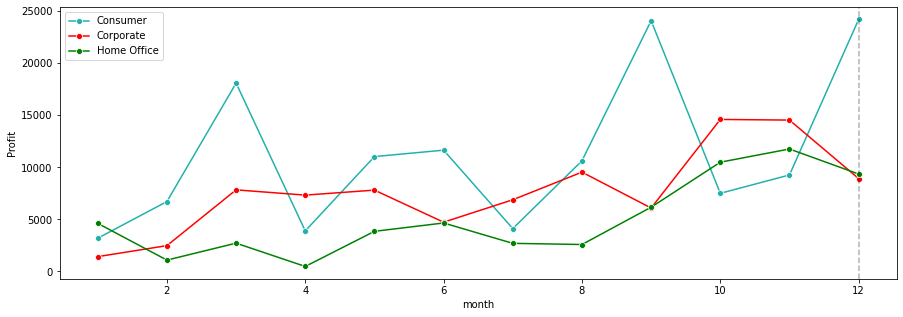

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(data = d_con.groupby('month').sum('Profit') , x = 'month' ,y = 'Profit',marker="o",color = "lightseagreen")
sns.lineplot(data = d_cor.groupby('month').sum('Profit') , x = 'month' ,y = 'Profit',marker="o",color = "red")
sns.lineplot(data = d_ho.groupby('month').sum('Profit') , x = 'month' ,y = 'Profit',marker="o",color = "green")

plt.axvline(12, color = "k", linestyle = '--', alpha = 0.3)

plt.legend(seg)
plt.show()

from this plot the **consumer** pattren diffrent from the corporate and home office the consumer get increase in 
months **decemper , septamber** in the last quarter but in the first quater get increase in **march**

for **corporate and home office** get increase in **october , novamber** oppisite the **consumer** it get decrease

and the previous analysis we found out that the decemper is the best month we get profit but that becouse the**consumer** 
but for **corporate and home office** it got drop off the profit 

in the end we can say that theres adiffrent between segments of customer to be more sure we are going to make hypothsis 
test and see where's the signficant different or not 



# get more info 

In [25]:
# lets make the hyposis test
from scipy.stats import f_oneway

In [27]:
f_oneway(d_con['Profit'],d_cor['Profit'],d_ho['Profit'])

F_onewayResult(statistic=0.9020616140540392, pvalue=0.40576537890610764)

# theres no diff in mean but there's a different but for distripution theres a diffrent